<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#creating x(feature matrix)
x = df.drop("target", axis=1)
#creating y (labels)
y = df["target"]


In [5]:
#choosing a model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
#training the model
clf.fit(x_train, y_train);

In [8]:
#predicting
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0])

In [9]:
y_test

,target
180,0
302,0
164,1
46,1
227,0
...,...
31,1
48,1
13,1
72,1


In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.747


In [11]:
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.7472527472527473

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        40
           1       0.74      0.84      0.79        51

    accuracy                           0.75        91
   macro avg       0.75      0.73      0.74        91
weighted avg       0.75      0.75      0.74        91



In [14]:
confusion_matrix(y_test, y_pred)

array([[25, 15],
       [ 8, 43]])

In [15]:
accuracy_score(y_test, y_pred)

0.7472527472527473

# **Fine Tuning the model**

In [16]:
#we need to tune the n_estimators
np.random.seed(0)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
  print(f"Model accuracy on test set: {clf.score(x_test, y_test)*100:.3f}%")
  print("")

Trying model with 10 estimators...
Model accuracy on test set: 79.121%

Trying model with 20 estimators...
Model accuracy on test set: 76.923%

Trying model with 30 estimators...
Model accuracy on test set: 76.923%

Trying model with 40 estimators...
Model accuracy on test set: 82.418%

Trying model with 50 estimators...
Model accuracy on test set: 75.824%

Trying model with 60 estimators...
Model accuracy on test set: 78.022%

Trying model with 70 estimators...
Model accuracy on test set: 79.121%

Trying model with 80 estimators...
Model accuracy on test set: 75.824%

Trying model with 90 estimators...
Model accuracy on test set: 76.923%



In [17]:
import pickle
pickle.dump(clf, open("random_forest_v1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_v1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7692307692307693

# **Finding best Settings**

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']   # <-- No 'auto' anymore
}


rf_random = RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    n_iter = 50,  # How many different combinations to try
    cv = 5,       # 5-fold cross-validation
    verbose = 2,  # How much information to print
    random_state = 42,
    n_jobs = -1   # Use all processors
)

In [20]:
rf_random.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=90),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [21]:
print(rf_random.best_params_)


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}


In [22]:
best_clf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=5,
    random_state=42
)

In [23]:
best_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [24]:
y_pred = best_clf.predict(x_test)

In [25]:
best_clf.score(x_train, y_train)

0.910377358490566

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7802197802197802

Confusion Matrix:
 [[25 15]
 [ 5 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        40
           1       0.75      0.90      0.82        51

    accuracy                           0.78        91
   macro avg       0.79      0.76      0.77        91
weighted avg       0.79      0.78      0.77        91



#**Use of predict_proba() function**

In [27]:
best_clf.predict_proba(x_test)

array([[0.9672165 , 0.0327835 ],
       [0.19388503, 0.80611497],
       [0.10885478, 0.89114522],
       [0.04377921, 0.95622079],
       [0.82599644, 0.17400356],
       [0.13657258, 0.86342742],
       [0.09216227, 0.90783773],
       [0.77373589, 0.22626411],
       [0.13263211, 0.86736789],
       [0.32985245, 0.67014755],
       [0.54272872, 0.45727128],
       [0.28845165, 0.71154835],
       [0.53227424, 0.46772576],
       [0.06465732, 0.93534268],
       [0.47525807, 0.52474193],
       [0.3675324 , 0.6324676 ],
       [0.83675408, 0.16324592],
       [0.17718482, 0.82281518],
       [0.13397477, 0.86602523],
       [0.87702904, 0.12297096],
       [0.46593365, 0.53406635],
       [0.99439685, 0.00560315],
       [0.3303756 , 0.6696244 ],
       [0.63335414, 0.36664586],
       [0.63433315, 0.36566685],
       [0.09915742, 0.90084258],
       [0.33122676, 0.66877324],
       [0.87087541, 0.12912459],
       [0.14445143, 0.85554857],
       [0.22986315, 0.77013685],
       [0.

In [28]:
best_clf.predict_proba(x_test[:5])

array([[0.9672165 , 0.0327835 ],
       [0.19388503, 0.80611497],
       [0.10885478, 0.89114522],
       [0.04377921, 0.95622079],
       [0.82599644, 0.17400356]])

This represents the probability of each class either heart disease or not heart disease

#**Evaluation of a model**
- `score` method
- `scoring` Parameter
- problem specific metrics functions

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#Using the score method

In [31]:
model.score(X_train, y_train)

1.0

In [32]:
model.score(X_test, y_test)

0.7912087912087912

#Using `cross-validation` scoring method

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.78688525, 0.8       , 0.78333333])

In [34]:
single_score = model.score(X_test, y_test)
cross_mean_score = np.mean(cross_val_score(model, X, y))
single_score, cross_mean_score

(0.7912087912087912, np.float64(0.8117486338797815))

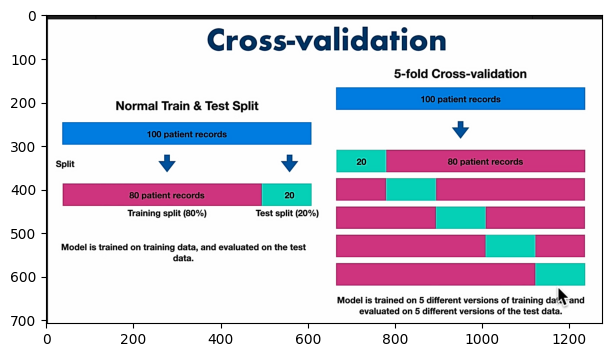

In [35]:
img = plt.imread("/content/drive/MyDrive/Colab Datasets/images/cv.png")
plt.figure(figsize=(15,4))
plt.imshow(img)

#cross validation takes the whole X and Y as input and divide the dataset to 5(cv=5) different splits and fit them.

#**Evaluation Report Data**
* cross_val_score accuracy
* AUC/ROC curve
* Confusion matrix
* Classification report

**Cross Val Accuracy**

In [36]:
np.random.seed(15)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

X = df.drop("target", axis=1)
y = df["target"]

cross_val=cross_val_score(model, X, y)

print(f"Cross Val Accuracy: {np.mean(cross_val)*100:.2f}%")


Cross Val Accuracy: 82.15%


**Area under the reciever operating characteristic curve(ROC/AUC)**

ROC is the ratio curve of model's true positive rate vs false positive rate.
- True Positive: Model predicts 1, when truth is 1.
- False Positive: Model predicts 1, when truth is 0.
- True Negative: Model predicts 0 when truth ia 0.
- False Negative: Model predicts 0 when truth is 1.

In [37]:
from sklearn.metrics import roc_curve
np.random.seed(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_preds = model.predict_proba(X_test)
y_preds[:5]

array([[0.98, 0.02],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.05, 0.95],
       [0.39, 0.61]])

In [38]:
y_prob_positive = y_preds[:, 1]
y_prob_positive[:10]

array([0.02, 0.38, 0.84, 0.95, 0.61, 0.29, 0.09, 0.38, 0.44, 0.78])

In [39]:
#Calculate tpr, fpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.05263158, 0.10526316,
       0.13157895, 0.13157895, 0.15789474, 0.15789474, 0.15789474,
       0.18421053, 0.18421053, 0.21052632, 0.26315789, 0.26315789,
       0.31578947, 0.34210526, 0.39473684, 0.39473684, 0.42105263,
       0.44736842, 0.55263158, 0.60526316, 0.71052632, 0.73684211,
       0.94736842, 1.        ])

Plotting the ROC curve

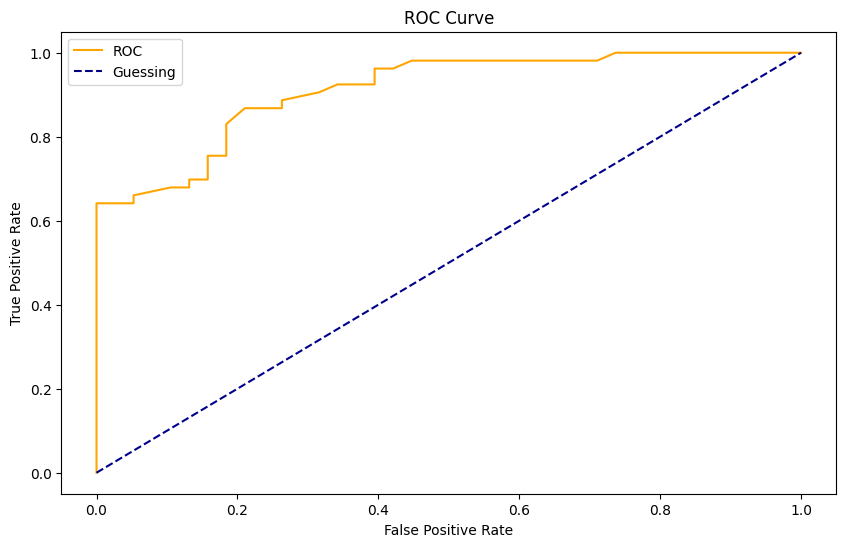

In [40]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Confusion Matrix**

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  7],
       [12, 41]])

In [42]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,31,7
1,12,41


**Visualize using Seaborn Heatmap**

Text(50.722222222222214, 0.5, 'Actual Labels')

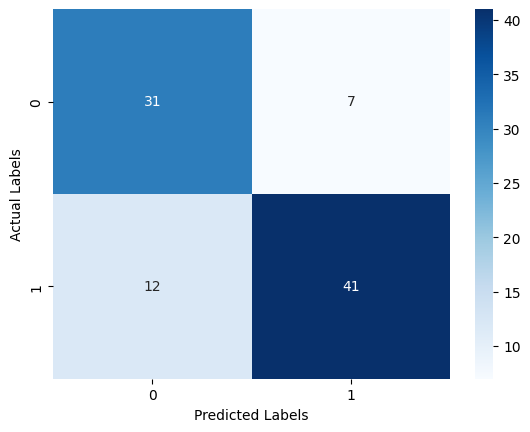

In [43]:
import seaborn as sns

cfmat = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cfmat, annot=True, cmap="Blues")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")

#**Evaluation of Regression Model**

- R^2
- Mean Absolute Error(MAE)
- Mean Squared Error(MSE)

In [44]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [45]:
np.random.seed(15)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
model.score(X_train, y_train)

0.9725505019978273

In [48]:
model.score(X_test, y_test)

0.7993097601118587

In [49]:
y_preds = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_score(y_test, y_preds)


0.7993097601118587

`model.score()` and `r2_score(y_test, y_preds)` is the same value.

**Mean Absolute Error(MAE)**

In [56]:
mean_absolute_error(y_test, y_preds)

0.33917013512596916

Here how its value `0.339......` comes

In [63]:
df = pd.DataFrame(data = {"Actual Values": y_test, "Predicted Values": y_preds})
df["diff"] = df["Actual Values"] - df["Predicted Values"]

df["Abs Diff"] = np.abs(df["diff"])
np.mean(df["Abs Diff"])

np.float64(0.33917013512596916)

**So MAE is the mean of the absolute difference between the actual and predicted values**

#Mean Squared Error(MSE)

In [65]:
mean_squared_error(y_test, y_preds)

0.2696792534596215

In [67]:
df["Squared Diff"] = np.square(df["diff"])
np.mean(df["Squared Diff"])

np.float64(0.2696792534596215)